In [1]:
! pip install datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 94.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 117.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.4 MB/s eta 0:00:00


In [1]:
from datasets import load_dataset

ds = load_dataset('jonathan-roberts1/RSSCN7')
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2800
    })
})

In [2]:
ex = ds['train'][400]
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400>,
 'label': 1}

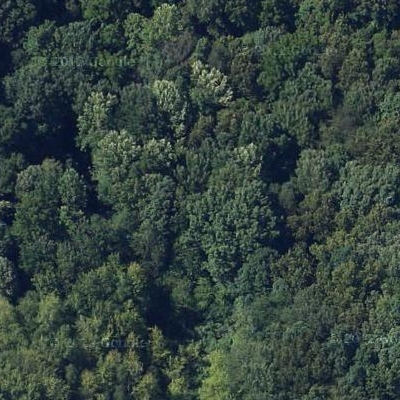

In [3]:
image = ex['image']
image

In [4]:
labels = ds['train'].features['label']
labels

ClassLabel(names=['field', 'forest', 'grass', 'industry', 'parking', 'resident', 'river or lake'], id=None)

In [5]:
labels.int2str(ex['label'])

'forest'

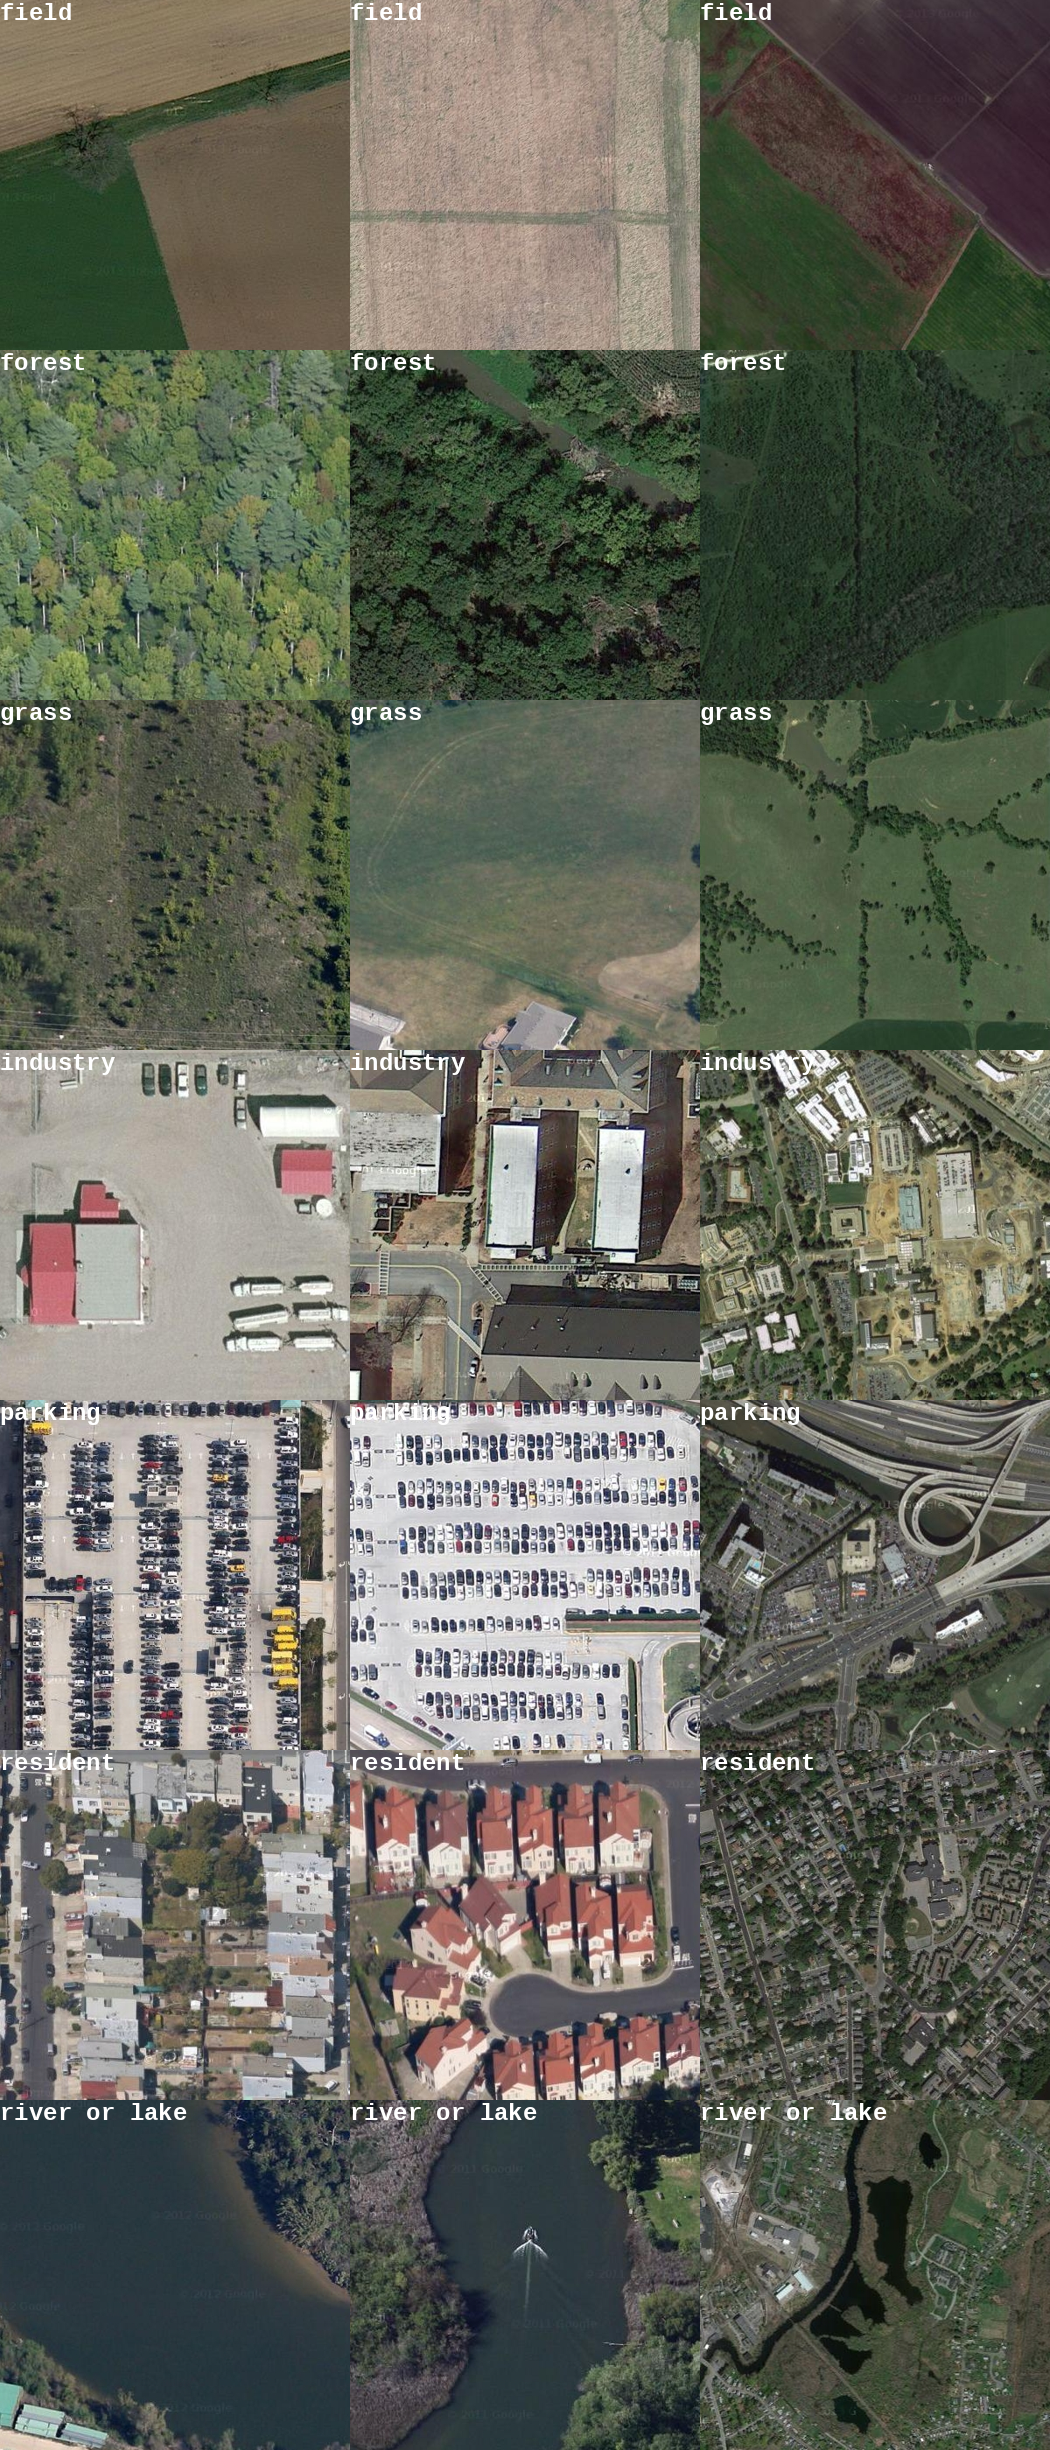

In [6]:
from transformers.utils.dummy_vision_objects import ImageGPTFeatureExtractor
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    labels = ds['train'].features['label'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", 24)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['label'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255), font=font)

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)

In [7]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

feature_extractor

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [8]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[-0.7333, -0.8039, -0.8039,  ..., -0.7333, -0.8431, -0.7490],
          [-0.7882, -0.8431, -0.7490,  ..., -0.8275, -0.7961, -0.6863],
          [-0.8275, -0.6392, -0.6235,  ..., -0.6941, -0.8588, -0.8431],
          ...,
          [-0.2784, -0.5608, -0.7882,  ..., -0.6784, -0.7569, -0.8118],
          [-0.4353, -0.6784, -0.7804,  ..., -0.8431, -0.7961, -0.7725],
          [-0.6000, -0.4353, -0.5843,  ..., -0.7569, -0.6549, -0.7176]],

         [[-0.6549, -0.7255, -0.7020,  ..., -0.6627, -0.7804, -0.6784],
          [-0.7098, -0.7647, -0.6471,  ..., -0.7569, -0.7412, -0.6235],
          [-0.7490, -0.5608, -0.5294,  ..., -0.6235, -0.7882, -0.7882],
          ...,
          [-0.1451, -0.4353, -0.6627,  ..., -0.5765, -0.6549, -0.7098],
          [-0.2941, -0.5451, -0.6549,  ..., -0.7412, -0.6941, -0.6706],
          [-0.4588, -0.3020, -0.4588,  ..., -0.6549, -0.5529, -0.6157]],

         [[-0.5922, -0.6549, -0.6549,  ..., -0.5765, -0.6549, -0.5451],
          [-0

In [9]:
def process_example(example):
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['label'] = example['label']
    return inputs

In [10]:
process_example(ds['train'][0])

{'pixel_values': tensor([[[[-0.1765, -0.2314, -0.1451,  ..., -0.0745, -0.0745, -0.0353],
          [-0.1608, -0.2157, -0.1529,  ..., -0.0745, -0.0824, -0.0588],
          [-0.0980, -0.1686, -0.1843,  ..., -0.0588, -0.0824, -0.0667],
          ...,
          [-0.1922, -0.1608, -0.1373,  ..., -0.1765, -0.1843, -0.1686],
          [-0.2784, -0.3255, -0.2941,  ..., -0.1216, -0.2235, -0.1529],
          [-0.4275, -0.4196, -0.3647,  ..., -0.1059, -0.1843, -0.1216]],

         [[-0.2941, -0.3412, -0.2392,  ..., -0.1608, -0.1608, -0.1216],
          [-0.2784, -0.3255, -0.2471,  ..., -0.1608, -0.1686, -0.1451],
          [-0.2157, -0.2784, -0.2784,  ..., -0.1451, -0.1686, -0.1529],
          ...,
          [-0.0353,  0.0196,  0.0588,  ..., -0.2627, -0.2706, -0.2549],
          [-0.1294, -0.1529, -0.0980,  ..., -0.2078, -0.3098, -0.2392],
          [-0.2863, -0.2627, -0.1843,  ..., -0.1922, -0.2706, -0.2078]],

         [[-0.3176, -0.3490, -0.2471,  ..., -0.1765, -0.1765, -0.1373],
          [-0

In [11]:
ds = load_dataset('jonathan-roberts1/RSSCN7')

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['label'] = example_batch['label']
    return inputs

prepared_ds = ds.with_transform(transform)

In [12]:
prepared_ds = ds.with_transform(transform)

In [13]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[-0.1765, -0.2314, -0.1451,  ..., -0.0745, -0.0745, -0.0353],
          [-0.1608, -0.2157, -0.1529,  ..., -0.0745, -0.0824, -0.0588],
          [-0.0980, -0.1686, -0.1843,  ..., -0.0588, -0.0824, -0.0667],
          ...,
          [-0.1922, -0.1608, -0.1373,  ..., -0.1765, -0.1843, -0.1686],
          [-0.2784, -0.3255, -0.2941,  ..., -0.1216, -0.2235, -0.1529],
          [-0.4275, -0.4196, -0.3647,  ..., -0.1059, -0.1843, -0.1216]],

         [[-0.2941, -0.3412, -0.2392,  ..., -0.1608, -0.1608, -0.1216],
          [-0.2784, -0.3255, -0.2471,  ..., -0.1608, -0.1686, -0.1451],
          [-0.2157, -0.2784, -0.2784,  ..., -0.1451, -0.1686, -0.1529],
          ...,
          [-0.0353,  0.0196,  0.0588,  ..., -0.2627, -0.2706, -0.2549],
          [-0.1294, -0.1529, -0.0980,  ..., -0.2078, -0.3098, -0.2392],
          [-0.2863, -0.2627, -0.1843,  ..., -0.1922, -0.2706, -0.2078]],

         [[-0.3176, -0.3490, -0.2471,  ..., -0.1765, -0.1765, -0.1373],
          [-0

In [14]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [15]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

<ipython-input-15-3044fb6e3895>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [16]:
from transformers import ViTForImageClassification

labels = ds['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 6.0 MB/s eta 0:00:00


In [19]:
!pip install accelerate -U

In [17]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./Remote-Sensing-Classification-image-classification",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [21]:
prepared_ds=prepared_ds['train'].train_test_split(test_size=0.2)

In [22]:
prepared_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2240
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 560
    })
})

In [23]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds['train'],
    eval_dataset=prepared_ds['test'],
    tokenizer=feature_extractor,
)

In [24]:
try:
  train_results = trainer.train()
  trainer.save_model()
  trainer.log_metrics("train", train_results.metrics)
  trainer.save_metrics("train", train_results.metrics)
  trainer.save_state()
except ValueError:
  pass

***** train metrics *****
  epoch                    =         4.0
  total_flos               = 646672530GF
  train_loss               =      0.2394
  train_runtime            =  0:05:55.19
  train_samples_per_second =      25.226
  train_steps_per_second   =       1.577


In [25]:
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.9589
  eval_loss               =     0.1593
  eval_runtime            = 0:00:10.45
  eval_samples_per_second =     53.564
  eval_steps_per_second   =      6.695


In [26]:
kwargs = {
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": 'jonathan-roberts1/RSSCN7',
    "tags": ['Remote-sensing'],
}

if training_args.push_to_hub:
    trainer.push_to_hub('🍻 cheers', **kwargs)
else:
    trainer.create_model_card(**kwargs)

In [27]:
!pip install huggingface_hub

In [28]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [29]:
trainer.push_to_hub('SeyedAli/Remote-Sensing-Image-Classification-VIT')

training_args.bin:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

'https://huggingface.co/SeyedAli/Remote-Sensing-Classification-image-classification/tree/main/'